In [1]:
import torch
import torch.nn.functional as F
from torch.autograd.functional import jacobian
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [2]:
torch.set_printoptions(precision=2, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                   ])
data = datasets.MNIST("./data", download=True, transform=transform)
pic, labels = next(iter(data))
pic = torch.unsqueeze(pic, dim=0)
# pic.requires_grad = True
pic_2 = F.interpolate(pic, scale_factor=2, mode="bilinear", align_corners=False)

pic_d2 = F.interpolate(pic, scale_factor=1/2, mode="bilinear", align_corners=False)
pic_d4 = F.interpolate(pic_d2, scale_factor=1/2, mode="bilinear", align_corners=False)
pic_d4.requires_grad = True
pic_d8 = F.interpolate(pic_d4, scale_factor=1/2, mode="bilinear", align_corners=False)
pic_d16 = F.interpolate(pic_d8, scale_factor=1/2, mode="bilinear", align_corners=False)
# pic_d32 = F.interpolate(pic_d16, scale_factor=1/2, mode="bilinear", align_corners=False)

In [5]:
print(pic.shape)
print(pic_2.shape)
print(pic_d2.shape)
print(pic_d4.shape)
print(pic_d8.shape)
print(pic_d16.shape)


torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 56, 56])
torch.Size([1, 1, 14, 14])
torch.Size([1, 1, 7, 7])
torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 1, 1])


In [73]:
print(torch.reshape(jacobian(lambda x : F.interpolate(x, scale_factor=2, mode="bilinear"), pic_d8), (18, 18)))
# print(torch.squeeze(jacobian(lambda x : F.interpolate(x, scale_factor=2, mode="bilinear"), torch.ones(pic_d8.shape))).shape)

tensor([[1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.75, 0.25, 0.00,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.25, 0.75, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.75, 0.25,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.25, 0.75, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.75, 0.00, 0.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.56, 0.19, 0.00,
         0.19, 0.06, 0.00, 0.00, 0.00, 0.00],
        [0.19, 0.56, 0.00, 0.06, 0.19, 0.00, 0.00, 0.00, 0.00, 0.00, 0.56, 0.19,
         0.00, 0.19, 0.06, 0.00, 0.00, 0.00],
        [0.00, 0.19, 0.56, 0.00, 0.06, 0.19, 0.00, 0.00, 0.00, 0.00, 0.00, 0.75,
         0.00, 0.00, 0.25, 0.00, 0.00, 0.00],
        [0.25, 0.00, 0.00, 0.75, 0.00, 0.00, 0.00, 0.00, 0.00, 0.19, 0.06, 0.00,
         0.56, 0.19, 0.00, 0.00, 0.00, 0.00],
        [0.06, 0.19, 0.00, 0.19, 0.56, 0.00, 0.00, 0.00, 0.00, 0.00, 0.19, 0.06,
         0.00, 0.56, 0.19, 0.0

In [11]:
print(pic_d4.grad)

tensor([[[[1., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

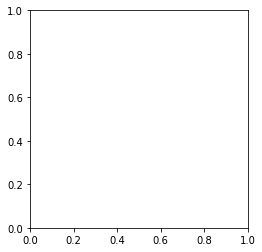

In [122]:
plt.imshow(torch.squeeze(pic), cmap="gray")

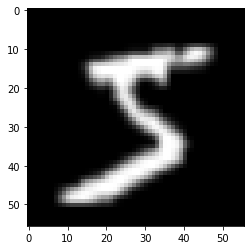

In [113]:
plt.imshow(torch.squeeze(pic_2), cmap="gray")

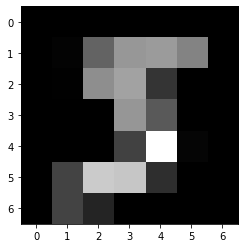

In [114]:
plt.imshow(torch.squeeze(pic_d4), cmap="gray")

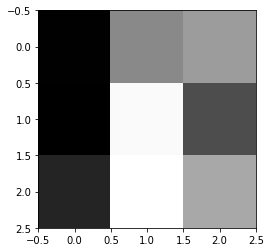

In [115]:
plt.imshow(torch.squeeze(pic_d8), cmap="gray")

In [116]:
pic_d8

tensor([[[[-0.4145,  0.2339,  0.3258],
          [-0.4206,  0.7720, -0.0515],
          [-0.2462,  0.7995,  0.3814]]]])

TypeError: 'NoneType' object is not callable